# Libraries

In [100]:
import pandas as pd

import matplotlib.pyplot as plt


from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split

from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Dataset Load

In [101]:
fraud_train = pd.read_csv("../Data/fraudTrain.csv", index_col='Unnamed: 0')
fraud_test = pd.read_csv("../Data/fraudTest.csv", index_col='Unnamed: 0')

df= pd.concat([fraud_train, fraud_test], axis= 0)

In [102]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


Description of the columns:

 - `trans_date_trans_time` - Date and hour of the transaction
 - `cc_num` - Account number of the client
 - `merchant` - Destinatary merchant's name
 - `category` - Merchant's category
 - `amt` - Transaction amount
 - `first` - Customer's first name
 - `last` - Customer's last name
 - `gender` - Customer's gender
 - `street` - Street. Assume it is the customer's address
 - `city` - Customer's city
 - `state` - Customer's state
 - `zip` - Customer's zip code. The previous `street`, `city` and `state` with this one compund the customer's address.
 - `lat` - Latitude of the customer's address
 - `long` - Loongitude of the customer's address
 - `city_pop` - Population of the city where customer is from.
 - `job` - Customer's occupation
 - `dob` - Customer's date of birth
 - `trans_num` - Transaction identifier
 - `unix_time` - Unix timestamp of the transaction
 - `merch_lat` - Merchant's latitude
 - `merch_long` - Merchant's longitude
 - `is_fraud` - Target column where a `0` means that transaction is not a fraud, while a `1` means it is.

# EDA

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

In [104]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [105]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [106]:
duplicates = fraud_train.duplicated()
if duplicates.any():
    print("Hay valores duplicados en el dataset")
else:
    print("No hay valores duplicados en el dataset")

No hay valores duplicados en el dataset


In [107]:
df_eda= df.copy()

In [108]:
df_eda.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


We check if we have duplicates in df.

In [109]:
duplicates = df_eda.duplicated()
if duplicates.any():
    print("Hay valores duplicados en el dataset")
else:
    print("No hay valores duplicados en el dataset")

No hay valores duplicados en el dataset


We proceed to analyze the df column by column to make a good research.

***trans_date_trans_time column***

In [110]:
df_eda['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                 ...         
555714    2020-12-31 23:59:07
555715    2020-12-31 23:59:09
555716    2020-12-31 23:59:15
555717    2020-12-31 23:59:24
555718    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [111]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

In [112]:
df_eda['trans_date_trans_time'] = pd.to_datetime(df_eda['trans_date_trans_time'])
df_eda['trans_date_trans_time']= df_eda['trans_date_trans_time'].apply(lambda x: datetime.timestamp(x))

In [113]:
df_eda['trans_date_trans_time']

0         1.546297e+09
1         1.546297e+09
2         1.546297e+09
3         1.546297e+09
4         1.546297e+09
              ...     
555714    1.609456e+09
555715    1.609456e+09
555716    1.609456e+09
555717    1.609456e+09
555718    1.609456e+09
Name: trans_date_trans_time, Length: 1852394, dtype: float64

In [114]:
df_eda['trans_date_trans_time'].value_counts()

trans_date_trans_time
1.555942e+09    4
1.590968e+09    4
1.591095e+09    4
1.601919e+09    4
1.607878e+09    4
               ..
1.546298e+09    1
1.546298e+09    1
1.546298e+09    1
1.546298e+09    1
1.546298e+09    1
Name: count, Length: 1819547, dtype: int64

There are some transactions in the same unix timestamp. Weirdly the amount of the most repited uses to be 4.

In [115]:
datetime.fromtimestamp(1.547097e+09)

datetime.datetime(2019, 1, 10, 6, 10)

In [116]:
datetime.fromtimestamp(1.608297e+09)

datetime.datetime(2020, 12, 18, 14, 10)

News of df start at January 1st, 2019 more or less and end at December 12th, 2020 more or less...

In [117]:
datetime.fromtimestamp(1.577097e+09)

datetime.datetime(2019, 12, 23, 11, 30)

There are two peaks at December 12th, 2019 and at December 12th, 2020.

In [118]:
df_eda.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1.546297e+09,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1.546297e+09,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1.546297e+09,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1.546297e+09,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1.546297e+09,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


---

***cc_num column***

In [119]:
df['cc_num']

0         2703186189652095
1             630423337322
2           38859492057661
3         3534093764340240
4          375534208663984
                ...       
555714      30560609640617
555715    3556613125071656
555716    6011724471098086
555717       4079773899158
555718    4170689372027579
Name: cc_num, Length: 1852394, dtype: int64

In [120]:
df['cc_num'].value_counts()

cc_num
30270432095985      4392
6538441737335434    4392
4642255475285942    4386
6538891242532018    4386
4364010865167176    4386
                    ... 
501894933032           7
4975457191020          7
6577777028615915       7
180097223252063        7
4295296907373          6
Name: count, Length: 999, dtype: int64

Every cc_num is repited at least 6 times, so there is interesting info we can get from repetition of account numbers.

---

***merchant column***

In [121]:
df_eda['merchant']

0                 fraud_Rippin, Kub and Mann
1            fraud_Heller, Gutmann and Zieme
2                       fraud_Lind-Buckridge
3         fraud_Kutch, Hermiston and Farrell
4                        fraud_Keeling-Crist
                         ...                
555714                 fraud_Reilly and Sons
555715                  fraud_Hoppe-Parisian
555716                       fraud_Rau-Robel
555717                 fraud_Breitenberg LLC
555718                     fraud_Dare-Marvin
Name: merchant, Length: 1852394, dtype: object

In [122]:
df_eda['merchant'].value_counts()

merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64

As expected by watching account number, merchants names also has a lot of repetitions. We we will preprocess this column later.

---

***category column***

In [123]:
df_eda['category']

0               misc_net
1            grocery_pos
2          entertainment
3          gas_transport
4               misc_pos
               ...      
555714    health_fitness
555715         kids_pets
555716         kids_pets
555717            travel
555718     entertainment
Name: category, Length: 1852394, dtype: object

In [124]:
df_eda['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

We decid to keep this one too.

---

***amt column***

In [125]:
df_eda['amt']

0           4.97
1         107.23
2         220.11
3          45.00
4          41.96
           ...  
555714     43.77
555715    111.84
555716     86.88
555717      7.99
555718     38.13
Name: amt, Length: 1852394, dtype: float64

In [126]:
df_eda['amt'].max()

np.float64(28948.9)

There are some outliers but the most of the amount are little, value less than 500.

---

***first column***

In [127]:
df_eda['first']

0          Jennifer
1         Stephanie
2            Edward
3            Jeremy
4             Tyler
            ...    
555714      Michael
555715         Jose
555716          Ann
555717         Eric
555718       Samuel
Name: first, Length: 1852394, dtype: object

We proceed to combine first and last column to find significative data to our model.

---

***last column***

In [128]:
df_eda['last']

0           Banks
1            Gill
2         Sanchez
3           White
4          Garcia
           ...   
555714      Olson
555715    Vasquez
555716     Lawson
555717    Preston
555718       Frey
Name: last, Length: 1852394, dtype: object

In [129]:
df_eda['name']= df_eda['first']+ ' '+ df_eda['last']

df_eda['name']

0         Jennifer Banks
1         Stephanie Gill
2         Edward Sanchez
3           Jeremy White
4           Tyler Garcia
               ...      
555714     Michael Olson
555715      Jose Vasquez
555716        Ann Lawson
555717      Eric Preston
555718       Samuel Frey
Name: name, Length: 1852394, dtype: object

In [130]:
df_eda['name'].value_counts()

name
Scott Martin         6583
Jeffrey Smith        5118
Gina Grimes          4392
Lisa Lin             4392
Linda Davis          4389
                     ... 
Samantha Ramirez        7
Danielle Schaefer       7
Joseph Bartlett         7
Kelly Lawrence          7
Destiny Fowler          6
Name: count, Length: 989, dtype: int64

Okey, now we see that there are repited persons making transactions, so this is a useful column.

---

***gender column***

In [131]:
df_eda['gender']

0         F
1         F
2         M
3         M
4         M
         ..
555714    M
555715    M
555716    F
555717    M
555718    M
Name: gender, Length: 1852394, dtype: object

In [132]:
df_eda['gender'].value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

Useful

---

***street column***

In [133]:
df_eda['street']

0                       561 Perry Cove
1         43039 Riley Greens Suite 393
2             594 White Dale Suite 530
3          9443 Cynthia Court Apt. 038
4                     408 Bradley Rest
                      ...             
555714             558 Michael Estates
555715             572 Davis Mountains
555716      144 Evans Islands Apt. 683
555717      7020 Doyle Stream Apt. 951
555718        830 Myers Plaza Apt. 384
Name: street, Length: 1852394, dtype: object

In [134]:
df_eda['street'].value_counts()

street
908 Brooks Brook                   4392
444 Robert Mews                    4392
320 Nicholson Orchard              4386
5796 Lee Coves Apt. 286            4386
03512 Jackson Ports                4386
                                   ... 
9599 Washington Field Suite 238       7
3437 Ross Flat Apt. 592               7
5124 Wendy Skyway Suite 154           7
7281 Joshua Mills Apt. 077            7
007 Tonya Isle Suite 299              6
Name: count, Length: 999, dtype: int64

This column doesn't seem to be usefull to predict a fake new so we will remove later.

---

***city column***

In [135]:
df_eda['city']

0         Moravian Falls
1                 Orient
2             Malad City
3                Boulder
4               Doe Hill
               ...      
555714             Luray
555715      Lake Jackson
555716           Burbank
555717              Mesa
555718            Edmond
Name: city, Length: 1852394, dtype: object

In [136]:
df_eda['city'].value_counts()

city
Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Norfolk           7
Chattanooga       7
Vacaville         7
Claypool          7
Wever             6
Name: count, Length: 906, dtype: int64

Useful

---

***state column***

In [137]:
df_eda['state']

0         NC
1         WA
2         ID
3         MT
4         VA
          ..
555714    MO
555715    TX
555716    WA
555717    ID
555718    OK
Name: state, Length: 1852394, dtype: object

In [138]:
df_eda['state'].value_counts()

state
TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: count, dtype: int64

Useful

---

***zip column***

In [139]:
df_eda['zip']

0         28654
1         99160
2         83252
3         59632
4         24433
          ...  
555714    63453
555715    77566
555716    99323
555717    83643
555718    73034
Name: zip, Length: 1852394, dtype: int64

In [140]:
df_eda['zip'].value_counts()

zip
82514    5116
73754    5116
48088    5115
34112    5108
61454    4392
         ... 
61364       7
46510       7
37411       7
16041       7
52658       6
Name: count, Length: 985, dtype: int64

We will keep this column.

---

***lat column***

In [141]:
df_eda['lat']

0         36.0788
1         48.8878
2         42.1808
3         46.2306
4         38.4207
           ...   
555714    40.4931
555715    29.0393
555716    46.1966
555717    44.6255
555718    35.6665
Name: lat, Length: 1852394, dtype: float64

Useful

---

***long column***

In [142]:
df_eda['long']

0         -81.1781
1        -118.2105
2        -112.2620
3        -112.1138
4         -79.4629
            ...   
555714    -91.8912
555715    -95.4401
555716   -118.9017
555717   -116.4493
555718    -97.4798
Name: long, Length: 1852394, dtype: float64

We will keep these both column to verify information sense.

---

***city_pop column***

In [143]:
df_eda['city_pop']

0           3495
1            149
2           4154
3           1939
4             99
           ...  
555714       519
555715     28739
555716      3684
555717       129
555718    116001
Name: city_pop, Length: 1852394, dtype: int64

Useful

---

***job column***

In [144]:
df_eda['job']

0                 Psychologist, counselling
1         Special educational needs teacher
2               Nature conservation officer
3                           Patent attorney
4            Dance movement psychotherapist
                        ...                
555714                         Town planner
555715                       Futures trader
555716                             Musician
555717                         Cartographer
555718                          Media buyer
Name: job, Length: 1852394, dtype: object

Useful

---

***dob column***

In [145]:
df_eda['dob']

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
555714    1966-02-13
555715    1999-12-27
555716    1981-11-29
555717    1965-12-15
555718    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [146]:
df_eda['dob'].value_counts()

dob
1977-03-23    8044
1988-09-15    6574
1981-08-29    6571
1955-05-06    5121
1960-01-13    4395
              ... 
1936-05-04       7
1964-09-17       7
1963-02-26       7
1999-10-26       7
1998-08-02       6
Name: count, Length: 984, dtype: int64

Useful info to verify data in df by training.

---

***trans_num column***

In [147]:
df_eda['trans_num']

0         0b242abb623afc578575680df30655b9
1         1f76529f8574734946361c461b024d99
2         a1a22d70485983eac12b5b88dad1cf95
3         6b849c168bdad6f867558c3793159a81
4         a41d7549acf90789359a9aa5346dcb46
                        ...               
555714    9b1f753c79894c9f4b71f04581835ada
555715    2090647dac2c89a1d86c514c427f5b91
555716    6c5b7c8add471975aa0fec023b2e8408
555717    14392d723bb7737606b2700ac791b7aa
555718    1765bb45b3aa3224b4cdcb6e7a96cee3
Name: trans_num, Length: 1852394, dtype: object

In [148]:
df_eda['trans_num'].value_counts()

trans_num
1765bb45b3aa3224b4cdcb6e7a96cee3    1
0b242abb623afc578575680df30655b9    1
1f76529f8574734946361c461b024d99    1
a1a22d70485983eac12b5b88dad1cf95    1
6b849c168bdad6f867558c3793159a81    1
                                   ..
8a6293af5ed278dea14448ded2685fea    1
413636e759663f264aae1819a4d4f231    1
c1d9a7ddb1e34639fe82758de97f4abf    1
3c74776e558f1499a7824b556e474b1d    1
d71c95ab6b7356dd74389d41df429c87    1
Name: count, Length: 1852394, dtype: int64

This column has no useful info, we will remove later.

---

***unix_time column***

In [149]:
df_eda['unix_time']

0         1325376018
1         1325376044
2         1325376051
3         1325376076
4         1325376186
             ...    
555714    1388534347
555715    1388534349
555716    1388534355
555717    1388534364
555718    1388534374
Name: unix_time, Length: 1852394, dtype: int64

In [150]:
df_eda['trans_date_trans_time']

0         1.546297e+09
1         1.546297e+09
2         1.546297e+09
3         1.546297e+09
4         1.546297e+09
              ...     
555714    1.609456e+09
555715    1.609456e+09
555716    1.609456e+09
555717    1.609456e+09
555718    1.609456e+09
Name: trans_date_trans_time, Length: 1852394, dtype: float64

This column has an infima difference with trans_date_trans_time column but also has the same reation between data so we will remove one of them.

---

***merch_lat column***

In [151]:
df_eda['merch_lat']

0         36.011293
1         49.159047
2         43.150704
3         47.034331
4         38.674999
            ...    
555714    39.946837
555715    29.661049
555716    46.658340
555717    44.470525
555718    36.210097
Name: merch_lat, Length: 1852394, dtype: float64

---

***merch_long column***

In [152]:
df_eda['merch_long']

0         -82.048315
1        -118.186462
2        -112.154481
3        -112.561071
4         -78.632459
             ...    
555714    -91.333331
555715    -96.186633
555716   -119.715054
555717   -117.080888
555718    -97.036372
Name: merch_long, Length: 1852394, dtype: float64

These two column are useful for the same reasen we explain before about lat and long columns.

---

***is_fraud(target) column***

In [153]:
df_eda['is_fraud']

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

Obviously it is a binary problem and this graphics shows us there is unbalanced class problem too so we will proceed to solve it later.

# Preprocess

In [154]:
df= df_eda.drop(['trans_date_trans_time', 'first', 'last',
'street', 'city', 'state', 'trans_num'], axis= 1)

In [155]:
df

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,name
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,Jennifer Banks
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,Stephanie Gill
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,Edward Sanchez
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,Jeremy White
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,63453,40.4931,-91.8912,519,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0,Michael Olson
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,Jose Vasquez
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,Ann Lawson
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0,Eric Preston


We proceed to make a preprocessing column by column.

***cc_num***

In [156]:
df['cc_num']

0         2703186189652095
1             630423337322
2           38859492057661
3         3534093764340240
4          375534208663984
                ...       
555714      30560609640617
555715    3556613125071656
555716    6011724471098086
555717       4079773899158
555718    4170689372027579
Name: cc_num, Length: 1852394, dtype: int64

This one just need scaling

---

***merchant column***

In [157]:
df['merchant']

0                 fraud_Rippin, Kub and Mann
1            fraud_Heller, Gutmann and Zieme
2                       fraud_Lind-Buckridge
3         fraud_Kutch, Hermiston and Farrell
4                        fraud_Keeling-Crist
                         ...                
555714                 fraud_Reilly and Sons
555715                  fraud_Hoppe-Parisian
555716                       fraud_Rau-Robel
555717                 fraud_Breitenberg LLC
555718                     fraud_Dare-Marvin
Name: merchant, Length: 1852394, dtype: object

In [158]:
aux_dict= df['merchant'].value_counts().to_dict()
df['merchant']= df['merchant'].replace(aux_dict)

df['merchant']

C:\Users\jds25\AppData\Local\Temp\ipykernel_14064\1697152896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['merchant']= df['merchant'].replace(aux_dict)


0         1768
1         3528
2         2642
3         3725
4         2290
          ... 
555714    2439
555715    3288
555716    3292
555717    1146
555718    2641
Name: merchant, Length: 1852394, dtype: int64

---

***category column***

In [159]:
df['category']

0               misc_net
1            grocery_pos
2          entertainment
3          gas_transport
4               misc_pos
               ...      
555714    health_fitness
555715         kids_pets
555716         kids_pets
555717            travel
555718     entertainment
Name: category, Length: 1852394, dtype: object

In [160]:
len(df['category'].unique())

14

In [161]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [162]:
df= pd.get_dummies(df, columns=['category'])

df

,cc_num,merchant,amt,gender,zip,lat,long,city_pop,job,dob,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,1768,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,3528,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,2642,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,3725,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,2290,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,2439,43.77,M,63453,40.4931,-91.8912,519,Town planner,1966-02-13,...,False,True,False,False,False,False,False,False,False,False
555715,3556613125071656,3288,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,...,False,False,False,True,False,False,False,False,False,False
555716,6011724471098086,3292,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981-11-29,...,False,False,False,True,False,False,False,False,False,False
555717,4079773899158,1146,7.99,M,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,...,False,False,False,False,False,False,False,False,False,True


---

***amt column***

In [163]:
df['amt']

0           4.97
1         107.23
2         220.11
3          45.00
4          41.96
           ...  
555714     43.77
555715    111.84
555716     86.88
555717      7.99
555718     38.13
Name: amt, Length: 1852394, dtype: float64

In [164]:
df['amt'].max()

np.float64(28948.9)

After testing some trys we decided to keep the outliers because it improves the validated metrics.

---

***gender column***

In [165]:
df['gender']

0         F
1         F
2         M
3         M
4         M
         ..
555714    M
555715    M
555716    F
555717    M
555718    M
Name: gender, Length: 1852394, dtype: object

In [166]:
df['gender'].value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

There are more news from females so we assign '1' to female sex.

In [167]:
df['gender']= df['gender'].replace({'M': 0, 'F': 1})

df['gender']

C:\Users\jds25\AppData\Local\Temp\ipykernel_14064\2108493305.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']= df['gender'].replace({'M': 0, 'F': 1})


0         1
1         1
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    1
555717    0
555718    0
Name: gender, Length: 1852394, dtype: int64

---

***zip column***

In [168]:
df['zip']

0         28654
1         99160
2         83252
3         59632
4         24433
          ...  
555714    63453
555715    77566
555716    99323
555717    83643
555718    73034
Name: zip, Length: 1852394, dtype: int64

This column just needs to be scaled.

---

***lat column***

In [169]:
df['lat']

0         36.0788
1         48.8878
2         42.1808
3         46.2306
4         38.4207
           ...   
555714    40.4931
555715    29.0393
555716    46.1966
555717    44.6255
555718    35.6665
Name: lat, Length: 1852394, dtype: float64

This column just needs to be scaled.

---

***long column***

In [170]:
df['long']

0         -81.1781
1        -118.2105
2        -112.2620
3        -112.1138
4         -79.4629
            ...   
555714    -91.8912
555715    -95.4401
555716   -118.9017
555717   -116.4493
555718    -97.4798
Name: long, Length: 1852394, dtype: float64

This column just needs to be scaled.

---

***city_pop column***

In [171]:
df['city_pop']

0           3495
1            149
2           4154
3           1939
4             99
           ...  
555714       519
555715     28739
555716      3684
555717       129
555718    116001
Name: city_pop, Length: 1852394, dtype: int64

This column just need scaling.

---

***job column***

In [172]:
df['job']

0                 Psychologist, counselling
1         Special educational needs teacher
2               Nature conservation officer
3                           Patent attorney
4            Dance movement psychotherapist
                        ...                
555714                         Town planner
555715                       Futures trader
555716                             Musician
555717                         Cartographer
555718                          Media buyer
Name: job, Length: 1852394, dtype: object

In [173]:
len(df['job'].unique())

497

In [174]:
df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

Grouping by semantic meaning would likely become in noise for our model so we replace again.

In [175]:
df['job'].value_counts()

job
Film/video editor                 13898
Exhibition designer               13167
Surveyor, land/geomatics          12436
Naval architect                   12434
Materials engineer                11711
                                  ...  
Engineer, water                       8
Armed forces technical officer        8
Ship broker                           7
Warehouse manager                     7
Contracting civil engineer            7
Name: count, Length: 497, dtype: int64

In [176]:
aux_dict= df['job'].value_counts().to_dict()
df['job']= df['job'].replace(aux_dict)

df['job']

C:\Users\jds25\AppData\Local\Temp\ipykernel_14064\2862824868.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['job']= df['job'].replace(aux_dict)


0         5121
1         7283
2          743
3         3662
4         2922
          ... 
555714    5850
555715    5860
555716    8772
555717    2921
555718    3651
Name: job, Length: 1852394, dtype: int64

---

***dob column***

In [177]:
df['dob']

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
555714    1966-02-13
555715    1999-12-27
555716    1981-11-29
555717    1965-12-15
555718    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [178]:
df['dob'] = pd.to_datetime(df['dob']).apply(lambda x: 2024 - x.year)
df.rename(columns={'dob': 'age'}, inplace=True)

df['age']

0         36
1         46
2         62
3         57
4         38
          ..
555714    58
555715    25
555716    43
555717    59
555718    31
Name: age, Length: 1852394, dtype: int64

---

***unix_time column***

In [179]:
df['unix_time']

0         1325376018
1         1325376044
2         1325376051
3         1325376076
4         1325376186
             ...    
555714    1388534347
555715    1388534349
555716    1388534355
555717    1388534364
555718    1388534374
Name: unix_time, Length: 1852394, dtype: int64

This column just need scaling.

---

***merch lat column***

In [180]:
df['merch_lat']

0         36.011293
1         49.159047
2         43.150704
3         47.034331
4         38.674999
            ...    
555714    39.946837
555715    29.661049
555716    46.658340
555717    44.470525
555718    36.210097
Name: merch_lat, Length: 1852394, dtype: float64

This column just needs to scale.

---

***merch long***

In [181]:
df['merch_long']

0         -82.048315
1        -118.186462
2        -112.154481
3        -112.561071
4         -78.632459
             ...    
555714    -91.333331
555715    -96.186633
555716   -119.715054
555717   -117.080888
555718    -97.036372
Name: merch_long, Length: 1852394, dtype: float64

This column just need to be scaled.

---

***is_fraud(target) column***

In [182]:
df['is_fraud']

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

This column is ready.

---

***name column***

In [183]:
df['name']

0         Jennifer Banks
1         Stephanie Gill
2         Edward Sanchez
3           Jeremy White
4           Tyler Garcia
               ...      
555714     Michael Olson
555715      Jose Vasquez
555716        Ann Lawson
555717      Eric Preston
555718       Samuel Frey
Name: name, Length: 1852394, dtype: object

In [184]:
df['name'].value_counts()

name
Scott Martin         6583
Jeffrey Smith        5118
Gina Grimes          4392
Lisa Lin             4392
Linda Davis          4389
                     ... 
Samantha Ramirez        7
Danielle Schaefer       7
Joseph Bartlett         7
Kelly Lawrence          7
Destiny Fowler          6
Name: count, Length: 989, dtype: int64

In [185]:
aux_dict= df['name'].value_counts().to_dict()
df['name']= df['name'].replace(aux_dict)

df['name']

C:\Users\jds25\AppData\Local\Temp\ipykernel_14064\846185638.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name']= df['name'].replace(aux_dict)


0         2927
1         4362
2          735
3          743
4         2922
          ... 
555714    2195
555715    3661
555716    3651
555717    2921
555718    3651
Name: name, Length: 1852394, dtype: int64

---

And here we got our preprocessed df.

In [186]:
df

,cc_num,merchant,amt,gender,zip,lat,long,city_pop,job,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,1768,4.97,1,28654,36.0788,-81.1781,3495,5121,36,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,3528,107.23,1,99160,48.8878,-118.2105,149,7283,46,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,2642,220.11,0,83252,42.1808,-112.2620,4154,743,62,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,3725,45.00,0,59632,46.2306,-112.1138,1939,3662,57,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,2290,41.96,0,24433,38.4207,-79.4629,99,2922,38,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,2439,43.77,0,63453,40.4931,-91.8912,519,5850,58,...,False,True,False,False,False,False,False,False,False,False
555715,3556613125071656,3288,111.84,0,77566,29.0393,-95.4401,28739,5860,25,...,False,False,False,True,False,False,False,False,False,False
555716,6011724471098086,3292,86.88,1,99323,46.1966,-118.9017,3684,8772,43,...,False,False,False,True,False,False,False,False,False,False
555717,4079773899158,1146,7.99,0,83643,44.6255,-116.4493,129,2921,59,...,False,False,False,False,False,False,False,False,False,True


In [187]:
df.columns

Index(['cc_num', 'merchant', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop',
       'job', 'age', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'name', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [188]:
df['unix_time']

0         1325376018
1         1325376044
2         1325376051
3         1325376076
4         1325376186
             ...    
555714    1388534347
555715    1388534349
555716    1388534355
555717    1388534364
555718    1388534374
Name: unix_time, Length: 1852394, dtype: int64

In [189]:
df['merch_lat']

0         36.011293
1         49.159047
2         43.150704
3         47.034331
4         38.674999
            ...    
555714    39.946837
555715    29.661049
555716    46.658340
555717    44.470525
555718    36.210097
Name: merch_lat, Length: 1852394, dtype: float64

In [190]:
df['merch_long']

0         -82.048315
1        -118.186462
2        -112.154481
3        -112.561071
4         -78.632459
             ...    
555714    -91.333331
555715    -96.186633
555716   -119.715054
555717   -117.080888
555718    -97.036372
Name: merch_long, Length: 1852394, dtype: float64

In [191]:
df['is_fraud']

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

In [192]:
df['name']

0         2927
1         4362
2          735
3          743
4         2922
          ... 
555714    2195
555715    3661
555716    3651
555717    2921
555718    3651
Name: name, Length: 1852394, dtype: int64

We separate the target to make some preprocesses.

In [193]:
X= df.drop('is_fraud', axis=1)
y= df['is_fraud']

We scale the df here, 'y' is aready scaled.

In [194]:
scaler= MinMaxScaler()

X= scaler.fit_transform(X)

X

array([[5.41453976e-04, 1.31090487e-01, 1.37142936e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14176199e-07, 4.71384377e-01, 3.66969625e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.77171158e-06, 3.00077340e-01, 7.56911555e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.20417608e-03, 4.25754060e-01, 2.96670916e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.05103937e-07, 1.08275329e-02, 2.41468293e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.35404572e-04, 2.99883991e-01, 1.28264917e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Clustering

In [195]:
inercias = list() 
  
for k in range(1, 11): 
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)    
    
    inercias.append(kmeans.inertia_) 
    
inercias

[2976636.2590377317,
 2513927.071494219,
 2450243.938318651,
 2308090.1708681444,
 2245207.668769446,
 2057807.5971712917,
 1988139.0072991257,
 1834034.6279221855,
 1703497.7123178784,
 1612229.3039941308]

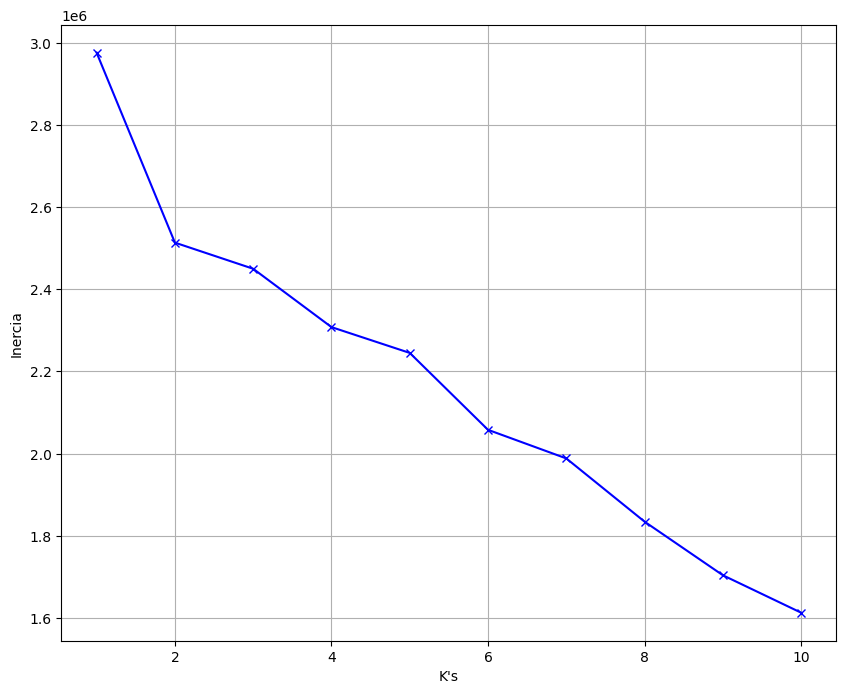

In [196]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.grid()
plt.show()

We decide to choose five clusters.

In [197]:
kmeans = KMeans(n_clusters = 5, random_state=33)
kmeans.fit(X)

kmeans.labels_

array([4, 3, 0, ..., 4, 0, 0], dtype=int32)

In [198]:
df['Cluster']= kmeans.labels_

In [199]:
df

,cc_num,merchant,amt,gender,zip,lat,long,city_pop,job,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Cluster
0,2703186189652095,1768,4.97,1,28654,36.0788,-81.1781,3495,5121,36,...,False,False,False,True,False,False,False,False,False,4
1,630423337322,3528,107.23,1,99160,48.8878,-118.2105,149,7283,46,...,False,False,False,False,False,False,False,False,False,3
2,38859492057661,2642,220.11,0,83252,42.1808,-112.2620,4154,743,62,...,False,False,False,False,False,False,False,False,False,0
3,3534093764340240,3725,45.00,0,59632,46.2306,-112.1138,1939,3662,57,...,False,False,False,False,False,False,False,False,False,0
4,375534208663984,2290,41.96,0,24433,38.4207,-79.4629,99,2922,38,...,False,False,False,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,2439,43.77,0,63453,40.4931,-91.8912,519,5850,58,...,True,False,False,False,False,False,False,False,False,0
555715,3556613125071656,3288,111.84,0,77566,29.0393,-95.4401,28739,5860,25,...,False,False,True,False,False,False,False,False,False,0
555716,6011724471098086,3292,86.88,1,99323,46.1966,-118.9017,3684,8772,43,...,False,False,True,False,False,False,False,False,False,4
555717,4079773899158,1146,7.99,0,83643,44.6255,-116.4493,129,2921,59,...,False,False,False,False,False,False,False,False,True,0


In [200]:
cl0= df[df['Cluster']== 0].drop('Cluster', axis= 1)
cl1= df[df['Cluster']== 1].drop('Cluster', axis= 1)
cl2= df[df['Cluster']== 2].drop('Cluster', axis= 1)
cl3= df[df['Cluster']== 3].drop('Cluster', axis= 1)
cl4= df[df['Cluster']== 4].drop('Cluster', axis= 1)

cldf_list= [cl0, cl1, cl2, cl3, cl4]

In [201]:
cl0

,cc_num,merchant,amt,gender,zip,lat,long,city_pop,job,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
2,38859492057661,2642,220.11,0,83252,42.1808,-112.2620,4154,743,62,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,3725,45.00,0,59632,46.2306,-112.1138,1939,3662,57,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,2290,41.96,0,24433,38.4207,-79.4629,99,2922,38,...,False,False,False,False,False,True,False,False,False,False
7,6011360759745864,3853,71.65,0,22824,38.8432,-78.6003,6018,1473,77,...,False,False,False,False,False,False,False,False,False,False
14,3514865930894695,3426,7.77,0,88325,32.9396,-105.8189,899,12434,57,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555712,501802953619,3279,13.02,0,96037,41.5403,-122.9366,308,5122,66,...,False,False,False,True,False,False,False,False,False,False
555714,30560609640617,2439,43.77,0,63453,40.4931,-91.8912,519,5850,58,...,False,True,False,False,False,False,False,False,False,False
555715,3556613125071656,3288,111.84,0,77566,29.0393,-95.4401,28739,5860,25,...,False,False,False,True,False,False,False,False,False,False
555717,4079773899158,1146,7.99,0,83643,44.6255,-116.4493,129,2921,59,...,False,False,False,False,False,False,False,False,False,True


Now we proceed to make our cluster classification model.

In [202]:
X= df.drop(['Cluster', 'is_fraud'], axis= 1)
y= df['Cluster']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

model= KNeighborsClassifier()
model.fit(X_train, y_train)

yhat= model.predict(X_test)

print(f'Jaccard: {jaccard_score(y_test, yhat, average= "macro")}')
print(f'Accuracy: {accuracy_score(y_test, yhat)}')
print(f'Precision: {precision_score(y_test, yhat, average= "macro")}')
print(f'Sensibility: {recall_score(y_test, yhat, average= "macro")}')
print(f'f1_score: {f1_score(y_test, yhat, average= "macro")}')

Jaccard: 1.0
Accuracy: 1.0
Precision: 1.0
Sensibility: 1.0
f1_score: 1.0


Our cluster predictor is good enough, so we keep it.

In [203]:
ccmodel= model

ccmodel

KNeighborsClassifier()

Now we have our clusters and cluster classification model we can proceed to the training.

# Training

We proceed to training several models to see wich is the beast for each cluster.

In [204]:
models = [
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('NearestCentroid', NearestCentroid()),
    ('GaussianNB', GaussianNB()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ]

metrics_dicts= {}

for enum, cluster in enumerate(cldf_list):

    X= cluster.drop('is_fraud', axis= 1)
    y= cluster['is_fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)  
        
    # Unbalance setting
    sampler = RandomUnderSampler(sampling_strategy=0.3)
    X_train, y_train = sampler.fit_resample(X_train, y_train)

    cluster_dict= {}

    for name, mdl in models:

        model= mdl
        model.fit(X_train, y_train)
        yhat= model.predict(X_test)
        
        jaccard= jaccard_score(y_test, yhat, average = "macro")
        accuracy= accuracy_score(y_test, yhat)
        precision= precision_score(y_test, yhat, average = "macro")
        sensibility= recall_score(y_test, yhat, average = "macro")
        f1score= f1_score(y_test, yhat, average = "macro")

        aux_dict= {'jaccard': jaccard,
                    'accuracy': accuracy,
                    'precision': precision,
                    'sensibility': sensibility,
                    'f1_score': f1score,
                    'model': model
                    }
        
        cluster_dict[name]= aux_dict
    
    metrics_dicts[enum]= cluster_dict

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

In [205]:
metrics_dicts

{0: {'KNeighborsClassifier': {'jaccard': np.float64(0.46339894264987863),
   'accuracy': 0.8998714410880834,
   'precision': np.float64(0.5123232450527129),
   'sensibility': np.float64(0.6903378620917827),
   'f1_score': np.float64(0.500057670200087),
   'model': KNeighborsClassifier()},
  'NearestCentroid': {'jaccard': np.float64(0.421217801984085),
   'accuracy': 0.8220400743512688,
   'precision': np.float64(0.509425733533013),
   'sensibility': np.float64(0.7387859718694589),
   'f1_score': np.float64(0.4716032912010417),
   'model': NearestCentroid()},
  'GaussianNB': {'jaccard': np.float64(0.35329281686358277),
   'accuracy': 0.6935139162975034,
   'precision': np.float64(0.5062751496993603),
   'sensibility': np.float64(0.7304542033151351),
   'f1_score': np.float64(0.4232785677980235),
   'model': GaussianNB()},
  'LogisticRegression': {'jaccard': np.float64(0.5227263013098558),
   'accuracy': 0.9627998002014363,
   'precision': np.float64(0.542806842851905),
   'sensibility':

We use a loop to get the best score of each model in each cluster.

In [206]:
model_dict= {}

for cluster in metrics_dicts:

    mscore= 0
    fmodel= str()
    
    for mdl in metrics_dicts[cluster]:

        jacccard= metrics_dicts[cluster][mdl]['jaccard']
        accuracy= metrics_dicts[cluster][mdl]['accuracy']
        precision= metrics_dicts[cluster][mdl]['precision']
        sensibility= metrics_dicts[cluster][mdl]['f1_score']
        f1= metrics_dicts[cluster][mdl]['f1_score']

        metrics= {'jaccard': jaccard,
                  'accuracy': accuracy,
                  'precision': precision,
                  'sensibility': sensibility,
                  'f1_score': f1,
                  'model': model
                  }

        tscore= jaccard+ accuracy+ precision+ sensibility+ f1

        if tscore> mscore:

            mscore= tscore
            fmodel= model
    
    model_dict[cluster]= {fmodel: metrics}

In [207]:
model_dict

{0: {AdaBoostClassifier(): {'jaccard': np.float64(0.5333189997710379),
   'accuracy': 0.9905259451536566,
   'precision': np.float64(0.6848839691996066),
   'sensibility': np.float64(0.7586569274593542),
   'f1_score': np.float64(0.7586569274593542),
   'model': AdaBoostClassifier()}},
 1: {AdaBoostClassifier(): {'jaccard': np.float64(0.5333189997710379),
   'accuracy': 0.9774877464949276,
   'precision': np.float64(0.5309454811593197),
   'sensibility': np.float64(0.5524648697898757),
   'f1_score': np.float64(0.5524648697898757),
   'model': AdaBoostClassifier()}},
 2: {AdaBoostClassifier(): {'jaccard': np.float64(0.5333189997710379),
   'accuracy': 0.9334506234223208,
   'precision': np.float64(0.5124842656567113),
   'sensibility': np.float64(0.5073494679651821),
   'f1_score': np.float64(0.5073494679651821),
   'model': AdaBoostClassifier()}},
 3: {AdaBoostClassifier(): {'jaccard': np.float64(0.5333189997710379),
   'accuracy': 0.9997162235023695,
   'precision': np.float64(0.9897

From this we can see that the best model is 'AdaBoostClassifier' for every cluster. So let's see if clusters improve our model.

In [208]:
pond_dict= df['Cluster'].value_counts(normalize= True).to_dict()

pond_dict

{4: 0.40995598128691846,
 0: 0.3296350560409934,
 3: 0.09511529404651495,
 1: 0.0947206695767747,
 2: 0.07057299904879848}

In [209]:
metrics_dicts

{0: {'KNeighborsClassifier': {'jaccard': np.float64(0.46339894264987863),
   'accuracy': 0.8998714410880834,
   'precision': np.float64(0.5123232450527129),
   'sensibility': np.float64(0.6903378620917827),
   'f1_score': np.float64(0.500057670200087),
   'model': KNeighborsClassifier()},
  'NearestCentroid': {'jaccard': np.float64(0.421217801984085),
   'accuracy': 0.8220400743512688,
   'precision': np.float64(0.509425733533013),
   'sensibility': np.float64(0.7387859718694589),
   'f1_score': np.float64(0.4716032912010417),
   'model': NearestCentroid()},
  'GaussianNB': {'jaccard': np.float64(0.35329281686358277),
   'accuracy': 0.6935139162975034,
   'precision': np.float64(0.5062751496993603),
   'sensibility': np.float64(0.7304542033151351),
   'f1_score': np.float64(0.4232785677980235),
   'model': GaussianNB()},
  'LogisticRegression': {'jaccard': np.float64(0.5227263013098558),
   'accuracy': 0.9627998002014363,
   'precision': np.float64(0.542806842851905),
   'sensibility':

In [210]:
wcscore= 0

for pnd in pond_dict:

    cscore= 0

    for metric in metrics_dicts[pnd]['AdaBoostClassifier']:

        if metric == 'model':

            break
        cscore+= metrics_dicts[pnd]['AdaBoostClassifier'][metric]



    wcscore+= cscore* pond_dict[pnd]

wcscore= wcscore/5

wcscore

np.float64(0.7637379668581454)

In [211]:
X= df.drop(['is_fraud', 'Cluster'], axis= 1)
y= df['is_fraud']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Unbalance setting
sampler = RandomUnderSampler(sampling_strategy=0.3)
X_train, y_train = sampler.fit_resample(X_train, y_train)

model= AdaBoostClassifier()

model.fit(X_train, y_train)

yhat= model.predict(X_test)

accuracy= accuracy_score(y_test, yhat)

jaccard= jaccard_score(y_test, yhat, average = "macro")
accuracy= accuracy_score(y_test, yhat)
precision= precision_score(y_test, yhat, average = "macro")
sensibility= recall_score(y_test, yhat, average = "macro")
f1score= f1_score(y_test, yhat, average = "macro")

print(f'Jaccard: {jaccard}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensibility: {sensibility}')
print(f'F1_score: {f1score}')

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Jaccard: 0.5750597648531401
Accuracy: 0.9785601882967726
Precision: 0.5882412598808523
Sensibility: 0.9110427781075259
F1_score: 0.641063976930859


In [212]:
wocscore= (jaccard+ accuracy+ precision+ sensibility+ f1score)/ 5

wocscore

np.float64(0.73879359361383)

As we can see our model works a bit better with clusters so we keep a model for each cluster.

In [213]:
c0model= metrics_dicts[0]['AdaBoostClassifier']['model']
c1model= metrics_dicts[1]['AdaBoostClassifier']['model']
c2model= metrics_dicts[2]['AdaBoostClassifier']['model']
c3model= metrics_dicts[3]['AdaBoostClassifier']['model']
c4model= metrics_dicts[4]['AdaBoostClassifier']['model']

tmodel_dict= {'cluster 0': c0model,
            'cluster 1': c1model,
            'cluster 2': c2model,
            'cluster 3': c3model,
            'cluster 4': c4model,
            'cluster classificator': ccmodel
            }

tmodel_dict

{'cluster 0': AdaBoostClassifier(),
 'cluster 1': AdaBoostClassifier(),
 'cluster 2': AdaBoostClassifier(),
 'cluster 3': AdaBoostClassifier(),
 'cluster 4': AdaBoostClassifier(),
 'cluster classificator': KNeighborsClassifier()}

# Tunning

Here we get the best params for each cluster.

In [214]:
tun_dict= {}

for enum, clust in enumerate(cldf_list):

    X= clust.drop('is_fraud', axis= 1)
    y= clust['is_fraud']

    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 43)

    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)
    
    sampler = RandomUnderSampler(sampling_strategy=0.3)
    X_train, y_train = sampler.fit_resample(X_train, y_train)    

    model = AdaBoostClassifier()

    params = {"n_estimators" : [3, 4, 5, 6, 7, 8, 9, 10, 100],
            "learning_rate" : [0.2, 0.5, 1, 2, 5, 10, 50],
            "random_state" : [10, 25, 37]}

    scorers = ["jaccard", "accuracy", "precision", "recall_macro", "f1_macro"]

    grid_solver = GridSearchCV(estimator  = model     , 
                            param_grid = params    , 
                            scoring    = scorers   ,
                            cv         = 5         ,
                            refit      = "precision",
                            n_jobs     = None,
                            verbose    = 2)

    model_result = grid_solver.fit(X_train, y_train)

    tun_dict[enum]= grid_solver.best_estimator_.get_params()

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.8s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.1s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.1s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   1.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   1.2s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precisio

[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, r

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.2s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.2s
[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.2s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.2s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.2s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.2s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, 

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, r

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.2s
[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.1s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, 

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, r

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.9s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   1.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   1.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   1.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   1.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.5s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.5s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.5s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.5s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.5s
[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.5s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, 

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, r

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   1.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   1.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   1.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   0.8s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s
[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.7s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   0.7s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50,

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algo

[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s


In [215]:
tun_dict

{0: {'algorithm': 'SAMME.R',
  'estimator': None,
  'learning_rate': 5,
  'n_estimators': 100,
  'random_state': 10},
 1: {'algorithm': 'SAMME.R',
  'estimator': None,
  'learning_rate': 10,
  'n_estimators': 5,
  'random_state': 10},
 2: {'algorithm': 'SAMME.R',
  'estimator': None,
  'learning_rate': 10,
  'n_estimators': 5,
  'random_state': 10},
 3: {'algorithm': 'SAMME.R',
  'estimator': None,
  'learning_rate': 0.2,
  'n_estimators': 100,
  'random_state': 10},
 4: {'algorithm': 'SAMME.R',
  'estimator': None,
  'learning_rate': 5,
  'n_estimators': 100,
  'random_state': 10}}

# Validation

Here we make a validation of the scores, cluster by cluster with its better params.

In [216]:
skfold = StratifiedKFold(n_splits = 5)

sk_dict= {}

for num, clust in enumerate(cldf_list):

    aux_dict={}

    X= clust.drop('is_fraud', axis= 1)
    y= clust['is_fraud']

    for enum, (train_indices, test_indices) in enumerate(skfold.split(X.to_numpy(), y.to_numpy())):

        X_train, y_train = X.to_numpy()[train_indices], y.to_numpy()[train_indices]
        X_test, y_test = X.to_numpy()[test_indices], y.to_numpy()[test_indices]

        X_train= scaler.fit_transform(X_train)
        X_test= scaler.transform(X_test)

        sampler = RandomUnderSampler(sampling_strategy=0.3)
        X_train, y_train = sampler.fit_resample(X_train, y_train)

        n_estimators= tun_dict[num]['n_estimators']
        learning_rate= tun_dict[num]['learning_rate']
        random_state= tun_dict[num]['random_state']

        model= AdaBoostClassifier(n_estimators= n_estimators, learning_rate= learning_rate, random_state= random_state)
        model.fit(X_train, y_train)
        
        yhat = model.predict(X_test)

        aux_dict[enum]={'jaccard': jaccard_score(y_test, yhat, average = "macro"),
                        'accuracy': accuracy_score(y_test, yhat),
                        'precision': precision_score(y_test, yhat, average = "macro"),
                        'sensibility': recall_score(y_test, yhat, average = "macro"),
                        'f1_score': f1_score(y_test, yhat, average= "macro"),
                        'model': model}


    sk_dict[num]= aux_dict



c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

In [217]:
sk_dict

{0: {0: {'jaccard': np.float64(0.5854805873057971),
   'accuracy': 0.9953489514669637,
   'precision': np.float64(0.9976721693086998),
   'sensibility': np.float64(0.5878084179970973),
   'f1_score': np.float64(0.6482160849841335),
   'model': AdaBoostClassifier(learning_rate=5, n_estimators=100, random_state=10)},
  1: {'jaccard': np.float64(0.5270993117024844),
   'accuracy': 0.9946938742087895,
   'precision': np.float64(0.9973460461001622),
   'sensibility': np.float64(0.5297532656023222),
   'f1_score': np.float64(0.5548338755046784),
   'model': AdaBoostClassifier(learning_rate=5, n_estimators=100, random_state=10)},
  2: {'jaccard': np.float64(0.5467273306937536),
   'accuracy': 0.9949067743176961,
   'precision': np.float64(0.997451968374913),
   'sensibility': np.float64(0.5492753623188406),
   'f1_score': np.float64(0.5884324921952236),
   'model': AdaBoostClassifier(learning_rate=5, n_estimators=100, random_state=10)},
  3: {'jaccard': np.float64(0.5438124779522756),
   'acc

Now we proceed to get mean of each metric in each cluster.

In [218]:
skmeans= {}

for clust in sk_dict:
    
    jaccard= 0 
    accuracy= 0
    precision= 0
    sensibility= 0
    f1score= 0

    for sk in sk_dict[clust]:

        jaccard+= sk_dict[clust][sk]['jaccard']
        accuracy+= sk_dict[clust][sk]['accuracy']
        precision+= sk_dict[clust][sk]['precision']
        sensibility+= sk_dict[clust][sk]['sensibility']
        f1score+= sk_dict[clust][sk]['f1_score']
        
    jaccard= jaccard/5
    accuracy= accuracy/5
    precision= precision/5
    sensibility= sensibility/5
    f1score= f1score/5

    skmeans[clust]= {'jaccard': jaccard,
                    'accuracy': accuracy,
                    'precision': precision,
                    'sensibility': sensibility,
                    'f1_score': f1score,
                    }


In [219]:
skmeans

{0: {'jaccard': np.float64(0.5499845262471894),
  'accuracy': 0.9949477083185332,
  'precision': np.float64(0.9974723788375851),
  'sensibility': np.float64(0.5525121474096044),
  'f1_score': np.float64(0.592726134702081)},
 1: {'jaccard': np.float64(0.5098926831992755),
  'accuracy': 0.9952125840647442,
  'precision': np.float64(0.518025842595101),
  'sensibility': np.float64(0.5398056182140978),
  'f1_score': np.float64(0.5227612380192166)},
 2: {'jaccard': np.float64(0.49947707701794686),
  'accuracy': 0.9687753022046918,
  'precision': np.float64(0.5324203041563894),
  'sensibility': np.float64(0.6069081119929549),
  'f1_score': np.float64(0.5200955896444267)},
 3: {'jaccard': np.float64(0.9869611022445716),
  'accuracy': 0.9996651358407203,
  'precision': np.float64(0.9883876005013796),
  'sensibility': np.float64(0.9985018737697707),
  'f1_score': np.float64(0.9933773614085185)},
 4: {'jaccard': np.float64(0.43027816154629106),
  'accuracy': 0.7977719252041086,
  'precision': np.

And the mean of our current models.

In [220]:
jaccard= 0 
accuracy= 0
precision= 0
sensibility= 0
f1score= 0

for clust in skmeans:

    jaccard+= skmeans[clust]['jaccard']
    accuracy+= skmeans[clust]['accuracy']
    precision+= skmeans[clust]['precision']
    sensibility+= skmeans[clust]['sensibility']
    f1score+= skmeans[clust]['f1_score']

jaccard= jaccard/5
accuracy= accuracy/5
precision= precision/5
sensibility= sensibility/5
f1score= f1score/5

print(f'Jaccard: {jaccard}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensibility: {sensibility}')
print(f'F1_Score: {f1score}')

Jaccard: 0.5953187100510549
Accuracy: 0.9512745311265597
Precision: 0.7690831761316673
Sensibility: 0.6459875359939189
F1_Score: 0.6174599011306404


Now let's check if the clustering makes a better preformance.

In [221]:
X= df.drop(['is_fraud', 'Cluster'], axis= 1)
y= df['is_fraud']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 43)

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

sampler = RandomUnderSampler(sampling_strategy=0.3)
X_train, y_train = sampler.fit_resample(X_train, y_train)    

model = AdaBoostClassifier()

params = {"n_estimators" : [3, 4, 5, 6, 7, 8, 9, 10, 100],
        "learning_rate" : [0.2, 0.5, 1, 2, 5, 10, 50],
        "random_state" : [10, 25, 37]}

scorers = ["jaccard", "accuracy", "precision", "recall_macro", "f1_macro"]

grid_solver = GridSearchCV(estimator  = model     , 
                        param_grid = params    , 
                        scoring    = scorers   ,
                        cv         = 5         ,
                        refit      = "precision",
                        n_jobs     = None,
                        verbose    = 2)

model_result = grid_solver.fit(X_train, y_train)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END .learning_rate=0.2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=6, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.2, n_estimators=100, random_state=37; total time=   2.4s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=4, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=25; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s
[CV] END .learning_rate=0.5, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=10; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.1s
[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   2.5s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=0.5, n_estimators=100, random_state=37; total time=   2.4s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=1, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=1, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=1, n_estimators=100, random_state=37; total time=   2.4s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=2, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=2, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   3.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   3.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   3.8s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   3.9s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=2, n_estimators=100, random_state=37; total time=   3.9s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ...learning_rate=5, n_estimators=3, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ...learning_rate=5, n_estimators=4, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=4, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=5, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.2s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.1s
[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...learning_rate=5, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=5, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=5, n_estimators=100, random_state=37; total time=   2.4s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=10, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=7, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=10; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=8, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.1s
[CV] END ..learning_rate=10, n_estimators=8, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..learning_rate=10, n_estimators=9, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=10; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=25; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.2s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .learning_rate=10, n_estimators=10, random_state=37; total time=   0.1s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=10; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   2.4s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=25; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   2.3s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END learning_rate=10, n_estimators=100, random_state=37; total time=   2.3s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Git

[CV] END ..learning_rate=50, n_estimators=3, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=4, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=5, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=6, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=7, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=8, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=25; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END ..learning_rate=50, n_estimators=9, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=25; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END .learning_rate=50, n_estimators=10, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=10; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=25; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encoun

[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s
[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s


c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:654: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\

[CV] END learning_rate=50, n_estimators=100, random_state=37; total time=   0.0s


In [222]:
grid_solver.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 5,
 'n_estimators': 100,
 'random_state': 10}

In [223]:
nc_dict={}

for enum, (train_indices, test_indices) in enumerate(skfold.split(X.to_numpy(), y.to_numpy())):

    X_train, y_train = X.to_numpy()[train_indices], y.to_numpy()[train_indices]
    X_test, y_test = X.to_numpy()[test_indices], y.to_numpy()[test_indices]

    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)

    sampler = RandomUnderSampler(sampling_strategy=0.3)
    X_train, y_train = sampler.fit_resample(X_train, y_train)

    model= AdaBoostClassifier(n_estimators= 5, learning_rate= 10, random_state= 10)
    model.fit(X_train, y_train)
    
    yhat = model.predict(X_test)

    nc_dict[enum]={'jaccard': jaccard_score(y_test, yhat, average = "macro"),
                    'accuracy': accuracy_score(y_test, yhat),
                    'precision': precision_score(y_test, yhat, average = "macro"),
                    'sensibility': recall_score(y_test, yhat, average = "macro"),
                    'f1_score': f1_score(y_test, yhat, average= "macro"),
                    'model': model}

c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jds25\Desktop\Github\Hack a Boss- Project 2\Hack-a-Boss--Project-2\venv\Lib\site-p

In [224]:
jaccard= 0 
accuracy= 0
precision= 0
sensibility= 0
f1score= 0

for clust in nc_dict:

    jaccard+= nc_dict[clust]['jaccard']
    accuracy+= nc_dict[clust]['accuracy']
    precision+= nc_dict[clust]['precision']
    sensibility+= nc_dict[clust]['sensibility']
    f1score+= nc_dict[clust]['f1_score']

jaccard= jaccard/5
accuracy= accuracy/5
precision= precision/5
sensibility= sensibility/5
f1score= f1score/5

print(f'Jaccard: {jaccard}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensibility: {sensibility}')
print(f'F1_Score: {f1score}')

Jaccard: 0.5432037073383331
Accuracy: 0.9952170002185378
Precision: 0.9479352274698906
Sensibility: 0.5460298163834512
F1_Score: 0.5816960594660359


Comparing our metrics we finally decide to keep the clusters.

# Final models

And finally here we got our definitive models.

In [225]:
tmodel_dict['cluster 0']= sk_dict[0][0]['model']
tmodel_dict['cluster 1']= sk_dict[1][0]['model']
tmodel_dict['cluster 2']= sk_dict[2][0]['model']
tmodel_dict['cluster 3']= sk_dict[3][0]['model']
tmodel_dict['cluster 4']= sk_dict[4][0]['model']

tmodel_dict

{'cluster 0': AdaBoostClassifier(learning_rate=5, n_estimators=100, random_state=10),
 'cluster 1': AdaBoostClassifier(learning_rate=10, n_estimators=5, random_state=10),
 'cluster 2': AdaBoostClassifier(learning_rate=10, n_estimators=5, random_state=10),
 'cluster 3': AdaBoostClassifier(learning_rate=0.2, n_estimators=100, random_state=10),
 'cluster 4': AdaBoostClassifier(learning_rate=5, n_estimators=100, random_state=10),
 'cluster classificator': KNeighborsClassifier()}